In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("titanic/train.csv")

In [19]:
#cek missing value,outliers, standar tipe data
#cek missing data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
#kolom Age, Cabin & Embarked memiliki missing value
#mengatasi missing value: mengisi missing value dengan median
df["Age"].fillna(df["Age"].median())


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [47]:
#mengisi missing value dengan nilai yang paling sering muncul
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace =True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15788\3832053495.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace =True)


In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [49]:
#menghapus kolom cabin karna dominan null
df.drop(columns=["Cabin"], inplace =True)

In [50]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Age'>

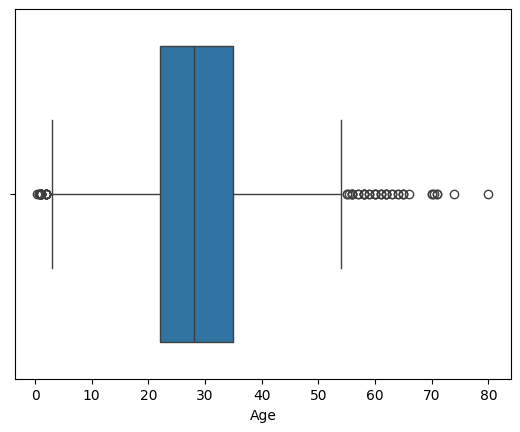

In [59]:
#Tahap 2: cek Outlier
import seaborn as sns
sns.boxplot(x=df["Age"])

In [13]:
#Mengecek nilai q1, iqr, q3
q1= df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
iqr=q3-q1
print(q1, q3, iqr)

20.125 38.0 17.875


In [14]:
#menghitung batas atas & batas bawah
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print (upper_limit, lower_limit)

64.8125 -6.6875


In [24]:
#tidak dilakukan capping (penggantian nilai outlier ke nilai batas atas atau batas bawah) karena data umur merepresentasikan nilai yang normal


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3717617174.py, line 2)

In [26]:
#Melakukan standarisasi Data Types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [39]:
df["Pclass"] =df["Pclass"].astype("category")
df["Sex"] =df["Sex"].astype("category")
df["Embarked"] =df["Embarked"].astype("category")
df["Survived"] =df["Survived"].astype("category")

In [ ]:
#encode categorical pada columns Sex, Embarked. hal ini untuk membuat columns baru untuk setiap kategori unik agar data lebih mudah di proses
df = pd.get_dummies(df, columns=["Sex","Embarked"],drop_first=True)

In [42]:
print(df)

     PassengerId Survived Pclass  \
0              1        0      3   
1              2        1      1   
2              3        1      3   
3              4        1      1   
4              5        0      3   
..           ...      ...    ...   
886          887        0      2   
887          888        1      1   
888          889        0      3   
889          890        1      1   
890          891        0      3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                  

In [47]:
#menyimpan perubahan ke csv dengan tidak menyimpan index
df.to_csv("titanic/train_cleaned.csv",index=False)

In [50]:
#Step Project02 untuk menangani missing value, outlier, standarisasi tipe data, mengencode kolom kategorikal, dan menyimpan data ke csv baru.
#langkah2 yang dilakukan:
#1. import pandas & membuka kembali file train.csv
#2. mengecek missing value tiap kolom
#3. menangani setiap mising value dengan pendekatan yang berbeda tergantung kondisinya
#4. mengecek outlier dengan seaborn, lalu cek nilai q1, q3, iqr untuk melihat apakah perlu dilakukan capping atau tidak
#5. men-standarisasi data type pada tiap kolom
#6. meng-encode kolom Sex, Embarked untuk menghasilkan kolom baru sesuai kategori
#7. menyimpan ke csv baru = train_cleaned.csv
